# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

In [3]:
# Method 1
%matplotlib inline
import seaborn as sns


In [4]:
import matplotlib.pyplot as plt

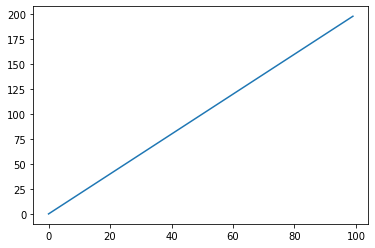

In [5]:
plt.plot(x, y, label='linear')

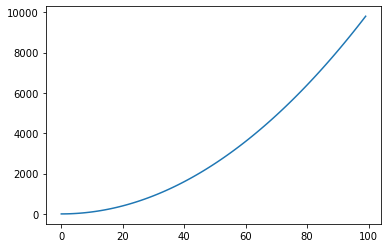

In [6]:
plt.plot(x, z, label='linear')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

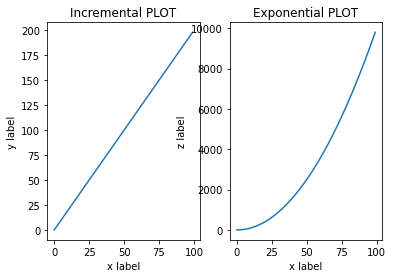

In [7]:
# Method 2

fig, [ax1, ax2] = plt.subplots(1,2)
ax1.plot(x,y)
ax1.set_title('Incremental PLOT')
ax1.set_xlabel('x label')
ax1.set_ylabel('y label')
ax2.plot(x,z)
ax2.set_title('Exponential PLOT')
ax2.set_xlabel('x label')
ax2.set_ylabel('z label')

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

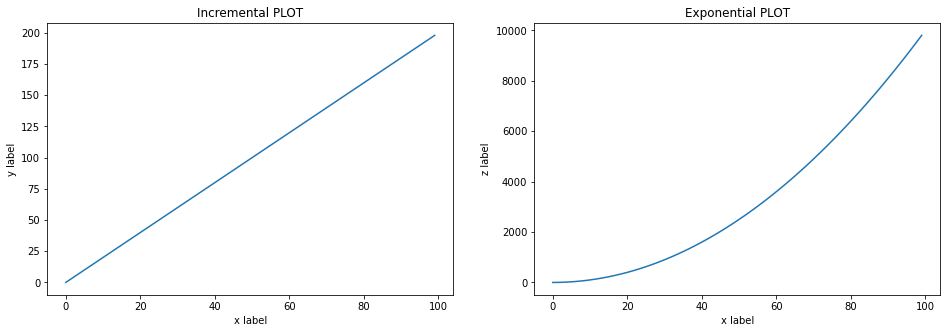

In [8]:
# your code here


fig, [ax1, ax2] = plt.subplots(1,2, figsize=(16,5))
ax1.plot(x,y)
ax1.set_title('Incremental PLOT')
ax1.set_xlabel('x label')
ax1.set_ylabel('y label')
ax2.plot(x,z)
ax2.set_title('Exponential PLOT')
ax2.set_xlabel('x label')
ax2.set_ylabel('z label')

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [9]:
import math

In [10]:
x1 = np.arange(0,100)


In [11]:
# your code here

def expo(x):
    return math.exp(x)



In [12]:
y = list(map(expo, x1))


In [13]:
print(list(y))

[1.0, 2.718281828459045, 7.38905609893065, 20.085536923187668, 54.598150033144236, 148.4131591025766, 403.4287934927351, 1096.6331584284585, 2980.9579870417283, 8103.083927575384, 22026.465794806718, 59874.14171519782, 162754.79141900392, 442413.3920089205, 1202604.2841647768, 3269017.3724721107, 8886110.520507872, 24154952.7535753, 65659969.13733051, 178482300.96318725, 485165195.4097903, 1318815734.4832146, 3584912846.131592, 9744803446.248903, 26489122129.84347, 72004899337.38588, 195729609428.83878, 532048240601.79865, 1446257064291.475, 3931334297144.042, 10686474581524.463, 29048849665247.426, 78962960182680.69, 214643579785916.06, 583461742527454.9, 1586013452313430.8, 4311231547115195.0, 1.1719142372802612e+16, 3.1855931757113756e+16, 8.659340042399374e+16, 2.3538526683702e+17, 6.398434935300549e+17, 1.739274941520501e+18, 4.727839468229346e+18, 1.2851600114359308e+19, 3.4934271057485095e+19, 9.496119420602448e+19, 2.5813128861900675e+20, 7.016735912097631e+20, 1.90734657249509

In [14]:
y2 = x1**2

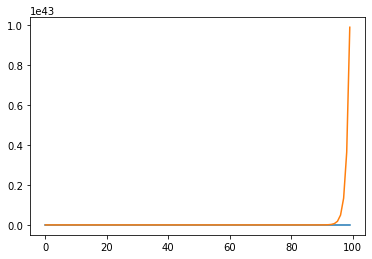

In [15]:
plt.plot(x, y2, y, label='MIXED')

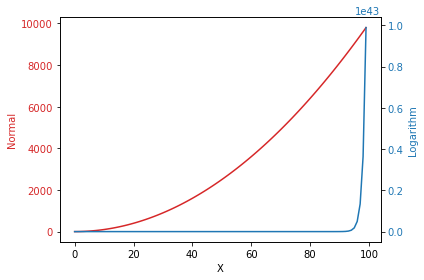

In [16]:
fig, ax3 = plt.subplots()

color = 'tab:red'
ax3.set_xlabel('X')
ax3.set_ylabel('Normal', color=color)
ax3.plot(x1, y2, color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()  

color = 'tab:blue'
ax4.set_ylabel('Logarithm', color=color)  
ax4.plot(x, y, color=color)
ax4.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

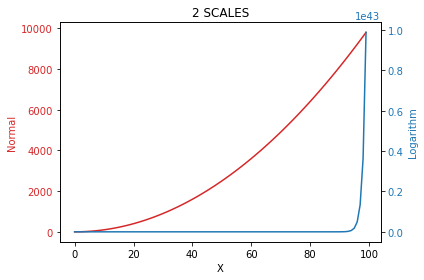

In [17]:
# your code here

fig, ax3 = plt.subplots()

color = 'tab:red'
ax3.set_title('2 SCALES')
ax3.set_xlabel('X')
ax3.set_ylabel('Normal', color=color)
ax3.plot(x1, y2, color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax4 = ax3.twinx()  

color = 'tab:blue'
ax4.set_ylabel('Logarithm', color=color)  
ax4.plot(x, y, color=color)
ax4.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [18]:
# your code here
import pandas as pd
import numpy as np

db = pd.read_csv('Fitbit2.csv')

In [19]:
db.head(1000)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [20]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
average_db_week = db.loc[(db['Work_or_Weekend'] == 0)]
average_db_weekend = db.loc[(db['Work_or_Weekend'] == 1)]

In [21]:
y1 = average_db_week.groupby(['Months_encoded']).mean()
y1 = y1[('Steps')]

In [22]:
y2 = average_db_weekend.groupby(['Months_encoded']).mean()
y2 = y2[('Steps')]

In [23]:
x = list(y2.index.values)
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [24]:
y1

Months_encoded
1      9618.400000
2     10882.250000
3      4941.250000
4      8285.666667
5     15005.900000
6     12717.125000
7      8851.000000
8     12462.900000
9      7846.750000
10     9441.333333
11     9624.000000
12     9725.875000
Name: Steps, dtype: float64

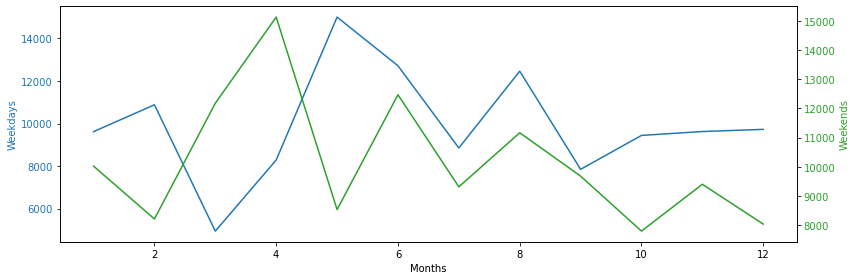

In [25]:
fig, ax5 = plt.subplots(figsize=(12,4))

color = 'tab:blue'
ax5.set_xlabel('Months')
ax5.set_ylabel('Weekdays', color=color)
ax5.plot(x, y1, color=color)
ax5.tick_params(axis='y', labelcolor=color)

ax6 = ax5.twinx()  

color = 'tab:green'
ax6.set_ylabel('Weekends', color=color)  
ax6.plot(x, y2, color=color)
ax6.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [26]:
# your code here

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [27]:
# your code here
titanic = pd.read_csv('titanic.csv')

#### Explore the titanic dataset using Pandas dtypes.

In [28]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [29]:
# NUMERICAL VARIABLES
# your code here
tin_num = titanic.select_dtypes(include=['float64','int64'])
tin_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [30]:
# CATEGORICAL VARIABLES
# your code here
tin_cat = titanic.select_dtypes(include=['object'])

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [31]:
# your code here

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


#### Use the right visulalization to show the distribution of column `Age`.

<AxesSubplot:>

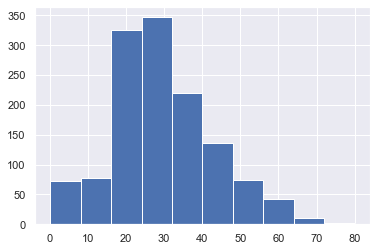

In [32]:
# your code here

tin_num['Age'].hist()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

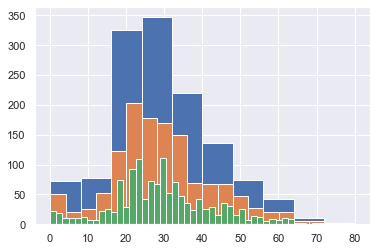

In [33]:
# your code here
age10 = tin_num['Age'].hist(bins=10)
age20 = tin_num['Age'].hist(bins=20)
age50 = tin_num['Age'].hist(bins=50)



ValueError: too many values to unpack (expected 1)

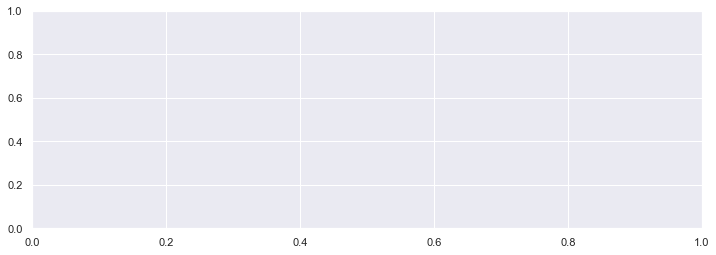

In [34]:
fig, = plt.subplots(figsize=(12,4))


#### How does the bin size affect your plot?

In [35]:
"""
your comments here
"""

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

In [36]:
# your code here

tin_age = tin_num['Age']



/Users/pablogtorres/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

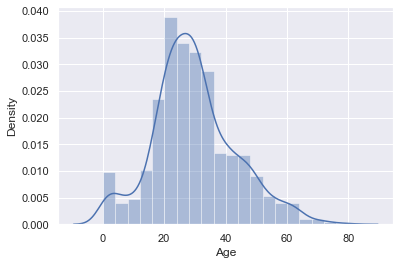

In [37]:
sns.distplot(tin_age, bins=20)


#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:>

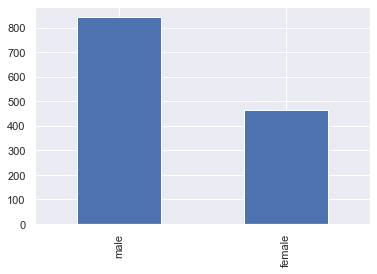

In [38]:
# Method 1 - matplotlib
# your code here

tin_cat['Gender'].value_counts().plot.bar()



In [39]:
# Method 2 - seaborn
# your code here

gen_count = tin_cat['Gender'].value_counts()
gen_count


male      843
female    466
Name: Gender, dtype: int64

In [40]:
#conda update --all

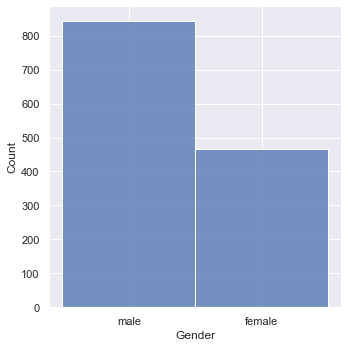

In [41]:
sns.displot(data=tin_cat, x='Gender')


#### Use the right plot to visualize the column `Pclass`.

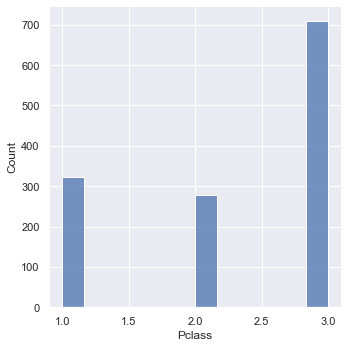

In [42]:
# your code here

sns.displot(data=tin_num, x='Pclass')


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [47]:
tin_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


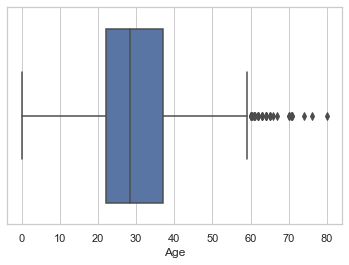

In [48]:
# your code here
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=tin_num["Age"])


In [ ]:
"""
your comments here

1- Wide range from 0 to 80
2- Median around 28 years.
3- Mostly all values among 22 to 38.
4- 90% of sample below 59?

"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

/Users/pablogtorres/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

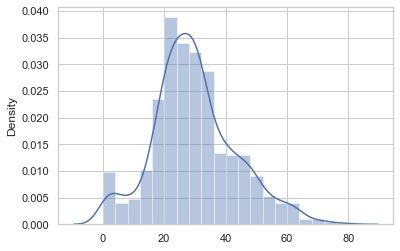

In [49]:
# your code here

sns.distplot(x=tin_num["Age"], bins=20)

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0, 0.5, 'Fare')

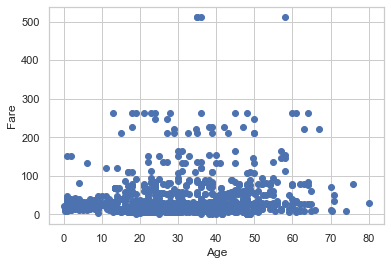

In [57]:
# Method 1 - matplotlib
# your code here

plt.scatter(tin_num['Age'], tin_num['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')





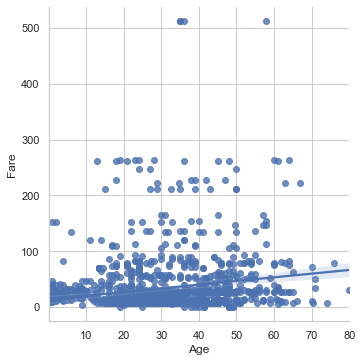

In [59]:
# Method 2 - seaborn
# your code here

sns.lmplot("Age", "Fare", data=tin_num, fit_reg=True)



#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

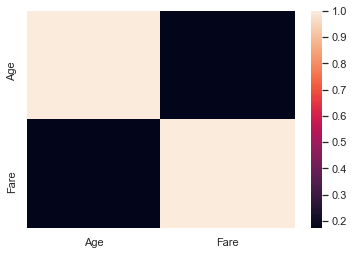

In [53]:
# your code here

sns.heatmap(tin_num2.corr())

#### What are the most correlated features?

In [ ]:
"""
your comments here

They are not correlated at all
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [66]:
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

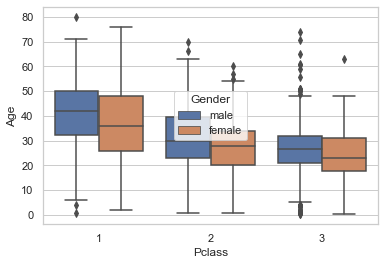

In [67]:
# your code here

sns.set_theme(style="whitegrid")
sns.boxplot(x='Pclass', y='Age', hue='Gender', data=titanic)




#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

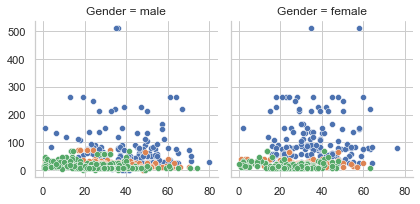

In [70]:
# your code here

g = sns.FacetGrid(titanic, col="Gender", hue="Pclass")
g.map_dataframe(sns.scatterplot, x="Age", y="Fare")